<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nltk
!python -m nltk.downloader punkt
!python -m nltk.downloader averaged_perceptron_tagger_ru

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


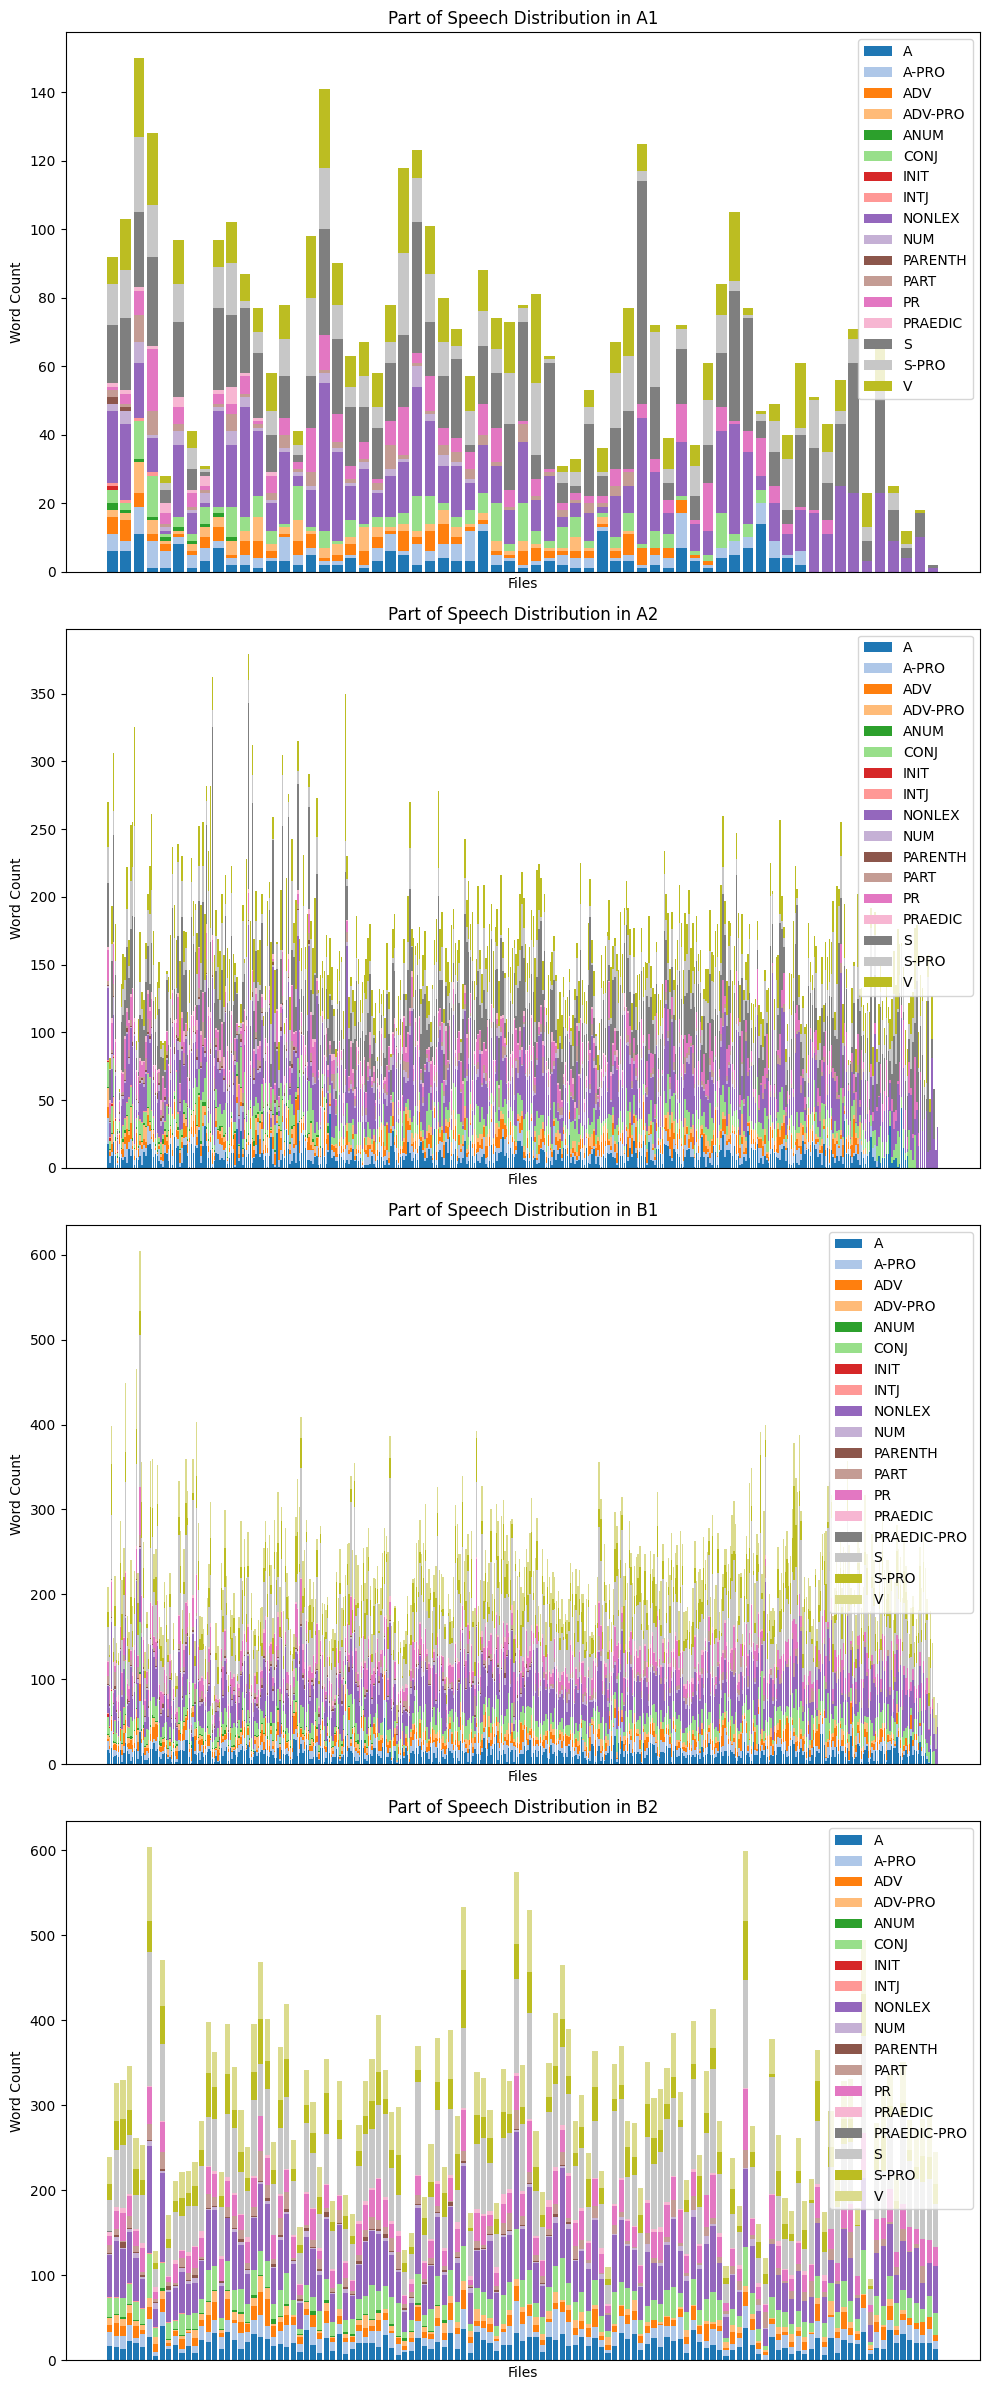

CEFR Level: A1
A: Avg = 3.77, % = 4.60%
A-PRO: Avg = 3.21, % = 3.91%
ADV: Avg = 2.80, % = 2.97%
ADV-PRO: Avg = 2.65, % = 2.44%
ANUM: Avg = 1.10, % = 0.25%
CONJ: Avg = 4.36, % = 5.01%
INIT: Avg = 1.00, % = 0.02%
INTJ: Avg = 1.00, % = 0.09%
NONLEX: Avg = 14.29, % = 20.70%
NUM: Avg = 2.11, % = 1.36%
PARENTH: Avg = 1.50, % = 0.07%
PART: Avg = 2.35, % = 2.16%
PR: Avg = 5.04, % = 6.37%
PRAEDIC: Avg = 1.77, % = 0.53%
S: Avg = 16.60, % = 24.06%
S-PRO: Avg = 8.75, % = 12.28%
V: Avg = 9.23, % = 13.16%


CEFR Level: A2
A: Avg = 9.54, % = 5.66%
A-PRO: Avg = 6.61, % = 3.77%
ADV: Avg = 6.38, % = 3.55%
ADV-PRO: Avg = 4.89, % = 2.75%
ANUM: Avg = 1.38, % = 0.23%
CONJ: Avg = 12.10, % = 7.25%
INIT: Avg = 1.17, % = 0.01%
INTJ: Avg = 1.03, % = 0.05%
NONLEX: Avg = 29.70, % = 18.28%
NUM: Avg = 3.11, % = 1.47%
PARENTH: Avg = 1.45, % = 0.22%
PART: Avg = 4.48, % = 2.53%
PR: Avg = 12.73, % = 7.67%
PRAEDIC: Avg = 2.41, % = 0.93%
S: Avg = 33.83, % = 20.73%
S-PRO: Avg = 17.72, % = 10.79%
V: Avg = 23.08, % = 14.11%


In [11]:
import os
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import re
from collections import Counter, defaultdict
from itertools import cycle

# Set the path to the directory containing the text files
directory = "/content/Students_texts"

# Regular expression pattern to match tags and [unclear]
pattern = re.compile(r'<[^>]+>|\[unclear\]')

# CEFR levels
cefr_levels = ['A1', 'A2', 'B1', 'B2']

# Initialize a subplot for each CEFR level
num_cefr_levels = len(cefr_levels)
fig, axes = plt.subplots(nrows=num_cefr_levels, figsize=(10, 6*num_cefr_levels))

# Dictionary to store part of speech counts for each level
level_pos_counts = defaultdict(list)

for i, cefr_level in enumerate(cefr_levels):
    level_directory = os.path.join(directory, cefr_level)
    pos_counts = []

    # Iterate over all files in the CEFR level directory
    for filename in os.listdir(level_directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(level_directory, filename)
            with open(filepath, "r", encoding="utf-8") as file:
                text = file.read()

            # Remove tags and [unclear] from the text
            cleaned_text = re.sub(pattern, '', text)

            # Tokenize the cleaned text into words
            words = word_tokenize(cleaned_text, language='russian')

            # Perform part-of-speech tagging
            pos_tags = nltk.pos_tag(words, lang='rus')

            # Count the occurrences of each part of speech
            pos_count = Counter(tag.split('=')[0] for word, tag in pos_tags)
            pos_counts.append(pos_count)

    # Prepare data for the stacked bar chart
    pos_names = set()
    data = defaultdict(list)

    for pos_count in pos_counts:
        for pos, count in pos_count.items():
            pos_names.add(pos)
            data[pos].append(count)

    # Fill in missing values with zeros
    for pos in pos_names:
        if pos not in data:
            data[pos] = [0] * len(pos_counts)

    # Plot the stacked bar chart
    ax = axes[i]
    bottom = [0] * len(pos_counts)
    pos_names = sorted(pos_names)
    num_colors = len(pos_names)
    colors = plt.cm.tab20.colors * (num_colors // 20 + 1)
    colors = cycle(colors)

    for j, pos in enumerate(pos_names):
        counts = [data[pos][k] if k < len(data[pos]) else 0 for k in range(len(pos_counts))]
        ax.bar(range(len(pos_counts)), counts, bottom=bottom, label=pos, color=next(colors))
        bottom = [sum(x) for x in zip(bottom, counts)]

    ax.set_xlabel("Files")
    ax.set_ylabel("Word Count")
    ax.set_title(f"Part of Speech Distribution in {cefr_level}")
    ax.set_xticks([])  # Remove x-axis ticks
    ax.legend(loc="upper right")

    # Calculate average counts and percentages
    avg_counts = {pos: sum(data[pos]) / len(data[pos]) for pos in pos_names}
    total_word_count = sum(sum(data[pos]) for pos in pos_names)
    percent_counts = {pos: (sum(data[pos]) / total_word_count) * 100 for pos in pos_names}

    # Store average counts and percentages for each level
    level_pos_counts[cefr_level] = (avg_counts, percent_counts)

plt.tight_layout()
plt.show()

# Print average counts and percentages for each level
for cefr_level, (avg_counts, percent_counts) in level_pos_counts.items():
    print(f"CEFR Level: {cefr_level}")
    for pos, avg_count in avg_counts.items():
        percent = percent_counts[pos]
        print(f"{pos}: Avg = {avg_count:.2f}, % = {percent:.2f}%")
    print("\n")